In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
import math
import time
from datetime import datetime
import numpy as np

In [4]:
aapl = yf.Ticker('AAPL')
hist = aapl.history(start = '2000-01-01', end = '2020-11-20')

Text(0.5, 1.0, 'Stock price, $')

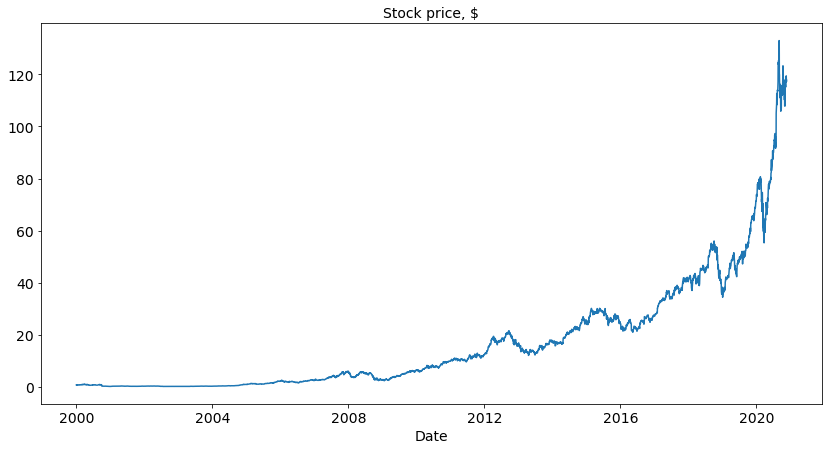

In [6]:
plt.figure(figsize=(14,7))
plt.plot(hist['Close'])
plt.xticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Stock price, $", fontsize = 14)

In [7]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-12-31,0.771698,0.786511,0.760708,0.786033,163811200,0.0,0.0
2000-01-03,0.801801,0.860096,0.777432,0.855796,535796800,0.0,0.0
2000-01-04,0.827604,0.845762,0.773610,0.783644,512377600,0.0,0.0
2000-01-05,0.793200,0.845284,0.787466,0.795111,778321600,0.0,0.0
2000-01-06,0.811358,0.818048,0.726304,0.726304,767972800,0.0,0.0
...,...,...,...,...,...,...,...
2020-11-13,118.557141,118.785437,116.998746,118.378471,81581900,0.0,0.0
2020-11-16,118.040978,120.095676,117.276672,119.410782,91183000,0.0,0.0
2020-11-17,118.666328,119.778045,118.080685,118.507507,74271000,0.0,0.0


In [8]:
daily = aapl.history(period = 'max', interval = '1d')['Close']
weekly = aapl.history(period = 'max', interval = '1wk')['Close']
monthly = aapl.history(period = 'max', interval = '1mo')['Close']
tenyrs = aapl.history(period = '10y', interval = '1d')['Close']
year = aapl.history(period = '1y', interval = '1d')['Close']

Text(0.5, 1.0, 'Stock price, $')

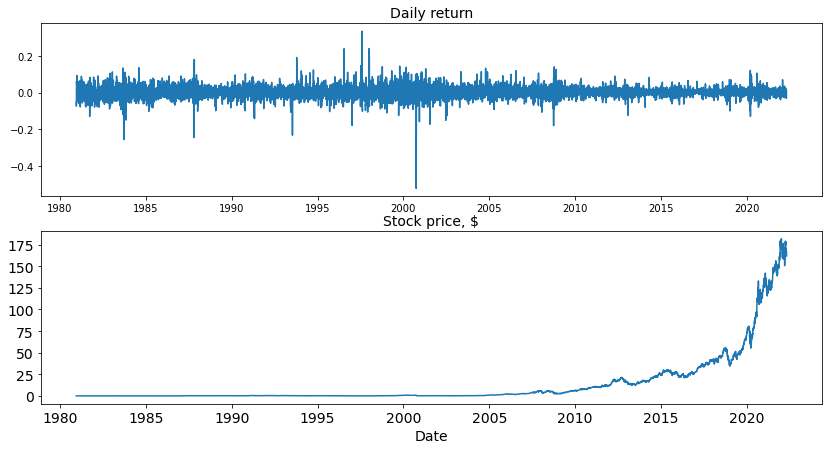

In [9]:
fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(daily.pct_change())
ax[1].plot(daily)
plt.xticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.yticks(fontsize = 14)
ax[0].set_title("Daily return", fontsize = 14)
ax[1].set_title("Stock price, $", fontsize = 14)

Text(0.5, 1.0, 'Stock price, $')

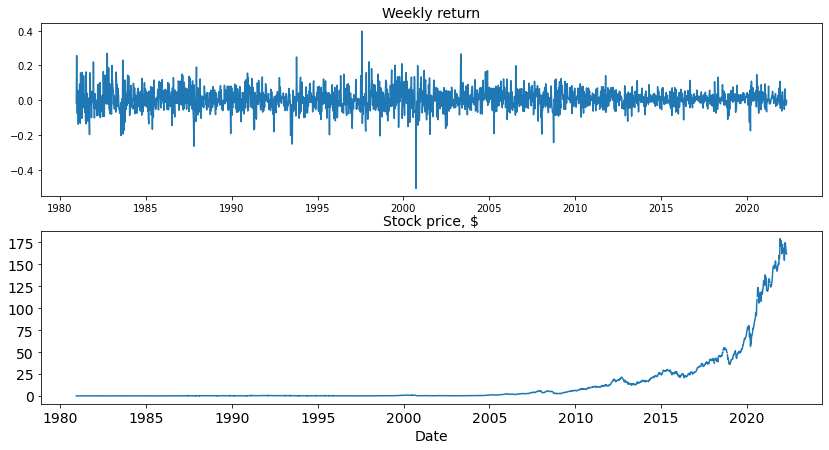

In [10]:
fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(weekly.pct_change())
ax[1].plot(weekly)
plt.xticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.yticks(fontsize = 14)
ax[0].set_title("Weekly return", fontsize = 14)
ax[1].set_title("Stock price, $", fontsize = 14)

Text(0.5, 1.0, 'Stock price, $')

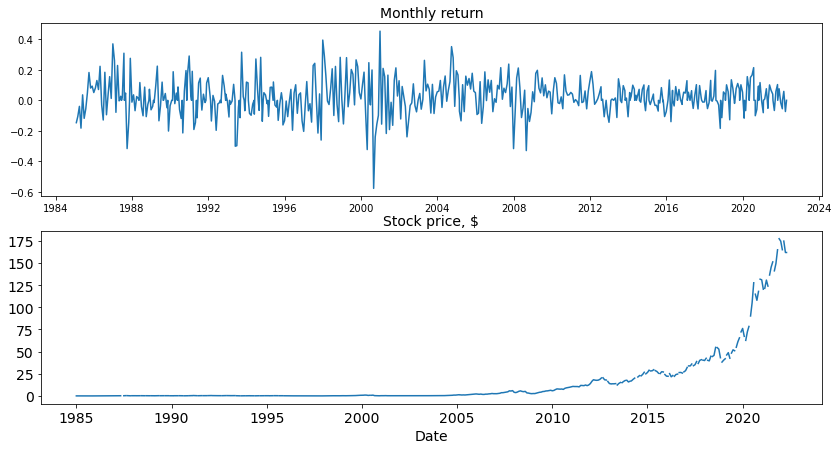

In [11]:
fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(monthly.pct_change())
ax[1].plot(monthly)
plt.xticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.yticks(fontsize = 14)
ax[0].set_title("Monthly return", fontsize = 14)
ax[1].set_title("Stock price, $", fontsize = 14)

Text(0.5, 1.0, 'Stock price, $')

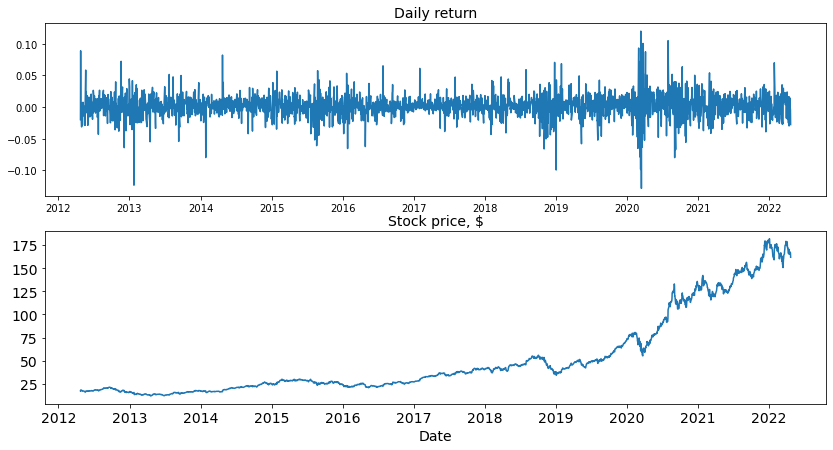

In [12]:
fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(tenyrs.pct_change())
ax[1].plot(tenyrs)
plt.xticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.yticks(fontsize = 14)
ax[0].set_title("Daily return", fontsize = 14)
ax[1].set_title("Stock price, $", fontsize = 14)

Text(0.5, 1.0, 'Stock price, $')

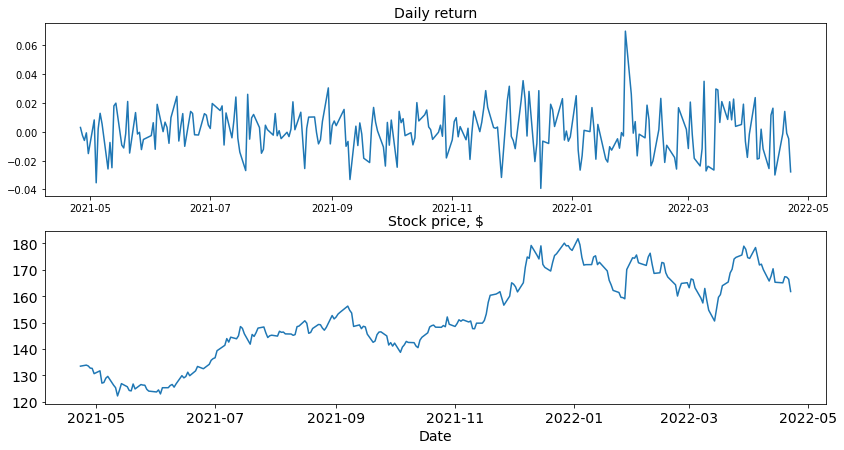

In [13]:
fig, ax = plt.subplots(2,1, figsize = (14,7))
ax[0].plot(year.pct_change())
ax[1].plot(year)
plt.xticks(fontsize = 14)
plt.xlabel("Date", fontsize = 14)
plt.yticks(fontsize = 14)
ax[0].set_title("Daily return", fontsize = 14)
ax[1].set_title("Stock price, $", fontsize = 14)

Text(0, 0.5, 'r_t-1')

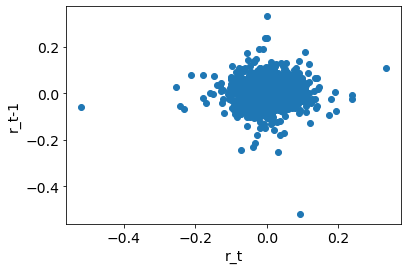

In [14]:
plt.scatter(daily.pct_change()[:-1], daily.pct_change()[1:])
plt.xticks(fontsize = 14)
plt.xlabel("r_t", fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel("r_t-1", fontsize = 14)

C:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


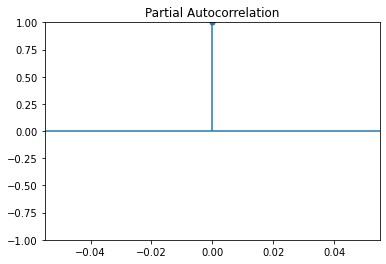

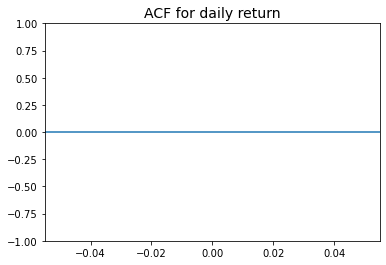

In [15]:
plot_pacf(daily.pct_change())
plot_acf(daily.pct_change())
plt.title("ACF for daily return", fontsize = 14)
plt.show()

In [16]:
df = pd.DataFrame(aapl.history(period = 'max', interval = '1d'))
df['daily_pct_change'] = df["Close"].pct_change()
mu = df['daily_pct_change'].iloc[:-252].mean()
sigma = df['daily_pct_change'].iloc[:-252].std()

simulation = {}
simulation['Actual'] = list(df['Close'].iloc[-252:].values)

for sim in range(1,5): # Taking 5 paths
    simulation["Simulation_"+str(sim)] = [df['Close'].iloc[-252]]
    for days in range(251):
        next_day = simulation["Simulation_"+str(sim)][-1]*np.exp((mu-(sigma**2/2))+sigma*np.random.normal())
        simulation["Simulation_"+str(sim)].append(next_day)

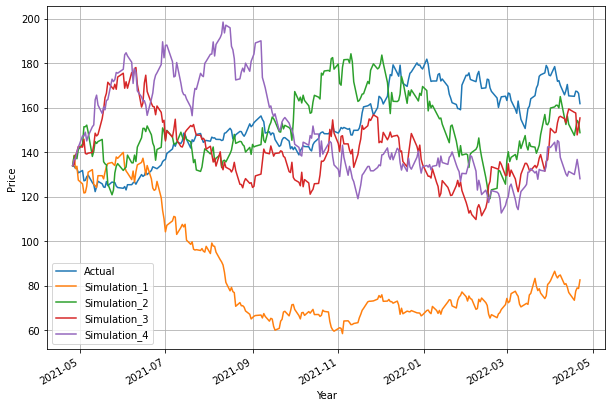

In [18]:
simulation=pd.DataFrame(simulation)
simulation.index=df[-252:].index
simulation.plot(figsize=(10,7),grid=True,legend=True)
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

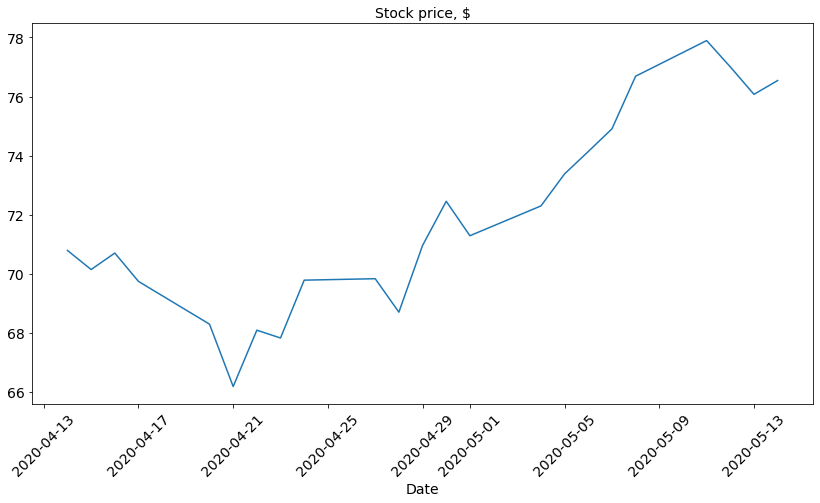

In [19]:
aapl = yf.Ticker('AAPL')
qrt = aapl.history(start = '2020-04-15', end = '2020-05-15')

plt.figure(figsize=(14,7))
plt.plot(qrt['Close'])
plt.xticks(fontsize = 14, rotation = 45)
plt.xlabel("Date", fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Stock price, $", fontsize = 14)
plt.show()

In [20]:
df['daily_pct_change'].mean()*365

0.4077991276260721